<a href="https://colab.research.google.com/github/SantyIzquierdo/4GeeksAcademy/blob/master/explore_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore here

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv'
df = pd.read_csv(url, encoding= 'utf-8', quotechar= '"')#.to_csv('../data/raw/medical_insurance_cost.csv', index=False, encoding= 'utf-8')

In [ ]:
#df = pd.read_csv('../data/raw/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df = df.drop(df[df['charges'] >= 50000].index)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
np.sort(df['age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

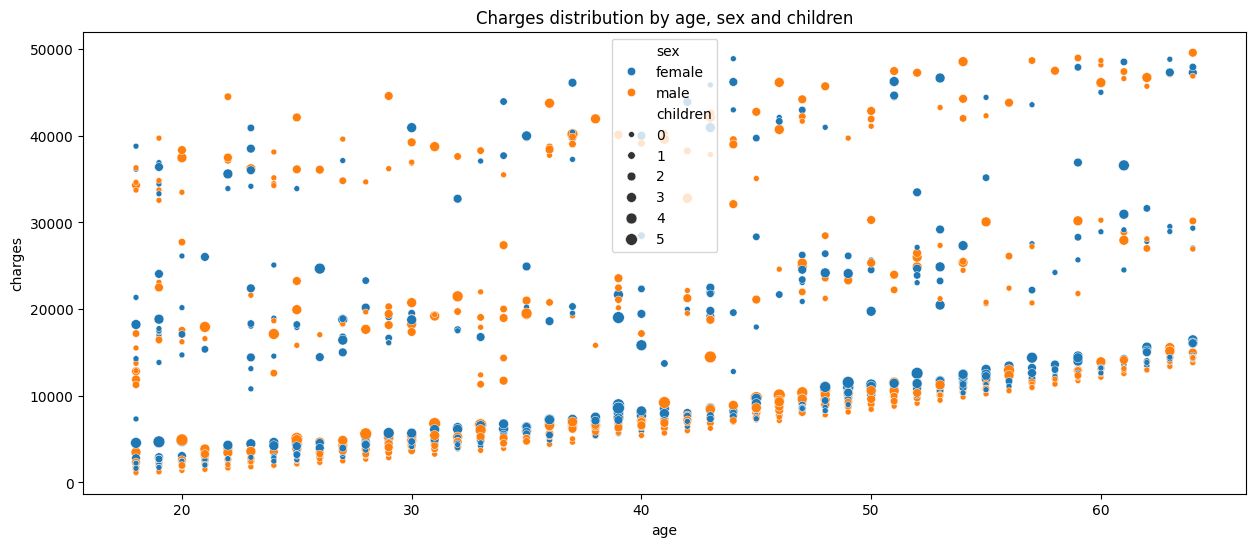

In [ ]:
plt.figure(figsize=(15, 6))

sns.scatterplot(df, x = 'age', y= 'charges', hue='sex', size= 'children')

plt.title('Charges distribution by age, sex and children')
plt.show()

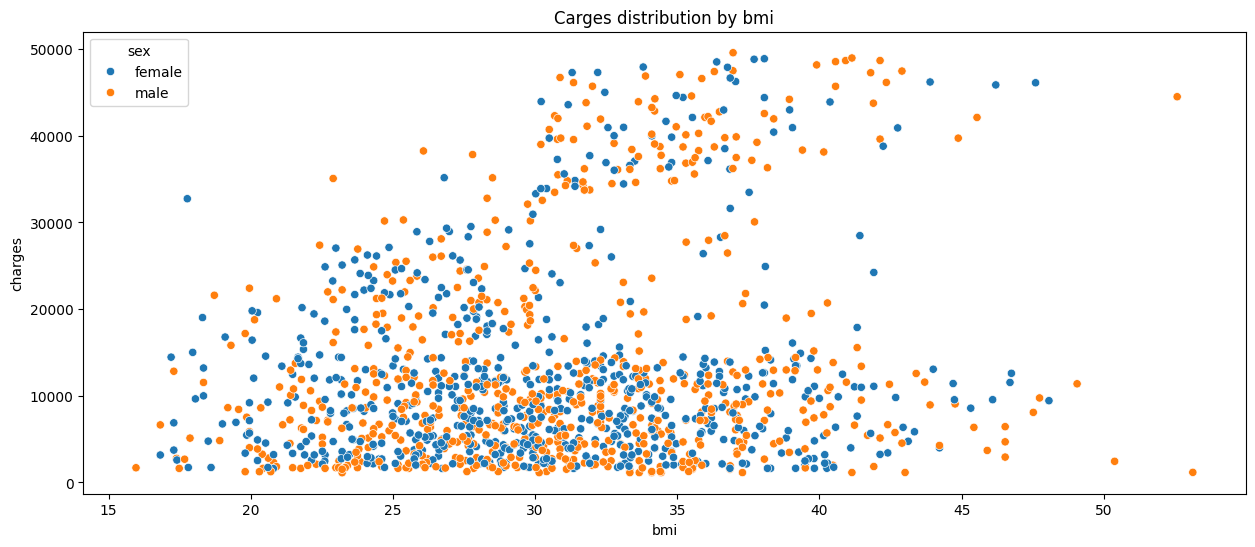

In [ ]:
plt.figure(figsize=(15, 6))

sns.scatterplot(df, x = 'bmi', y= 'charges', hue='sex')

plt.title('Carges distribution by bmi')
plt.show()

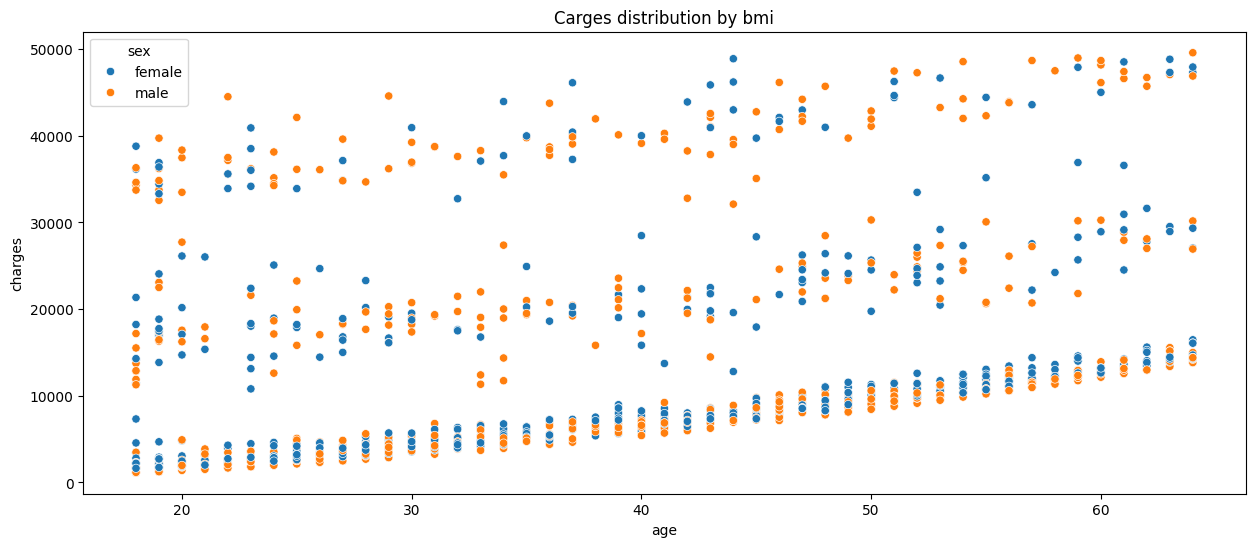

In [ ]:
plt.figure(figsize=(15, 6))

sns.scatterplot(df, x = 'age', y= 'charges', hue='sex')

plt.title('Carges distribution by bmi')
plt.show()

In [ ]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

nums = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

scaler = StandardScaler()
scal_features = scaler.fit_transform(df[nums])

df_scaled = pd.DataFrame(scal_features, index=df.index, columns=nums)

df_scaled['charges'] = df['charges']

df_scaled.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,-1.436416,-0.449030,-0.909871,-1.009815,-1.996251,-1.344505,16884.92400
1,-1.507576,0.515401,-0.080393,0.990280,0.500939,-0.439328,1725.55230
2,-0.795971,0.388891,1.578564,0.990280,0.500939,-0.439328,4449.46200
3,-0.440169,-1.302559,-0.909871,0.990280,0.500939,0.465850,21984.47061
4,-0.511329,-0.288017,-0.909871,0.990280,0.500939,0.465850,3866.85520


In [ ]:
#train test split
X = df_scaled.drop(['charges'], axis = 1)
y = df_scaled['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
#linear regression model

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

,charges
950,11534.87265
1131,3693.42800
1239,3238.43570
298,38746.35510
657,4058.71245
...,...
533,19214.70553
1200,6198.75180
759,36307.79830
1298,5261.46945


In [ ]:
#compare y_pred

y_test = y_test.reset_index(drop=True)

pred = pd.DataFrame({'y_pred':y_pred})
pred['y_test'] = y_test
pred['error'] = pred['y_pred'] - pred['y_test']
pred

,y_pred,y_test,error
0,9510.484965,11534.87265,-2024.387685
1,9373.114373,3693.42800,5679.686373
2,7664.491247,3238.43570,4426.055547
3,31641.736913,38746.35510,-7104.618187
4,6727.640093,4058.71245,2668.927643
...,...,...,...
262,8428.164253,19214.70553,-10786.541277
263,6897.088404,6198.75180,698.336604
264,27033.242751,36307.79830,-9274.555549
265,6721.652197,5261.46945,1460.182747


In [ ]:
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)


(35590520.230514, 0.7758304739465028)

In [ ]:
X_descaled = df.loc[X_test.index].drop(['sex', 'smoker', 'region','charges'], axis=1)
X_descaled.head()

,age,bmi,children,sex_n,smoker_n,region_n
950,57,18.335,0,1,1,3
1131,27,45.900,2,1,1,0
1239,25,42.130,1,0,1,1
298,31,34.390,3,1,0,2
657,27,33.155,2,1,1,2


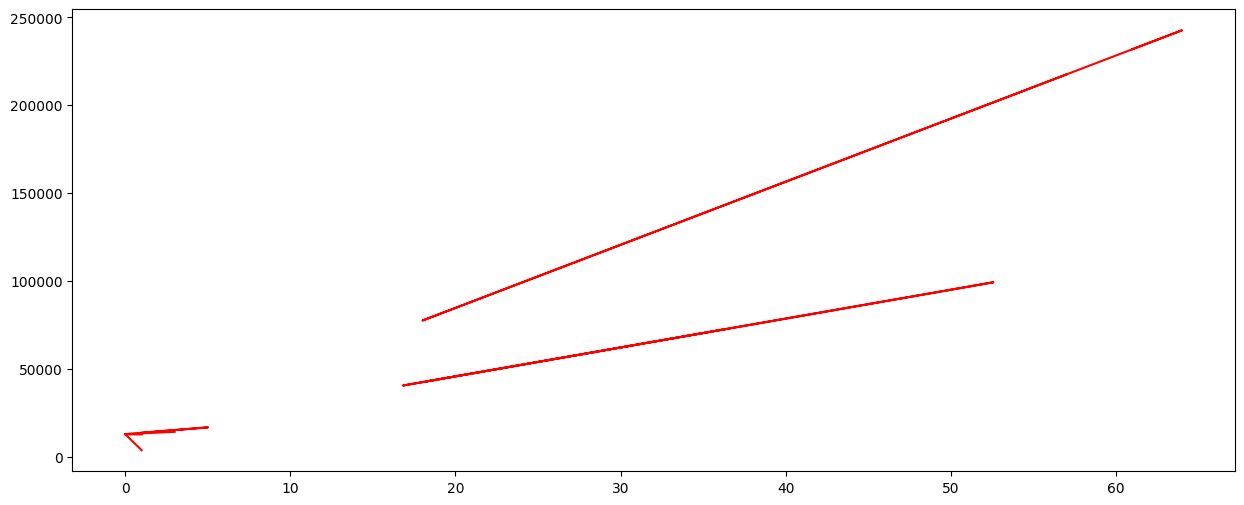

In [ ]:
m = model.coef_
b = model.intercept_
regression = m * X_descaled + b

plt.figure(figsize=(15, 6))
plt.plot(X_descaled, regression, color='red')
plt.show()

In [ ]:
print(m)
print(b)

[ 3588.05663531  1642.23803446   768.54275947   -30.02917599
 -9179.14565356   438.22335406]
13006.56259961125


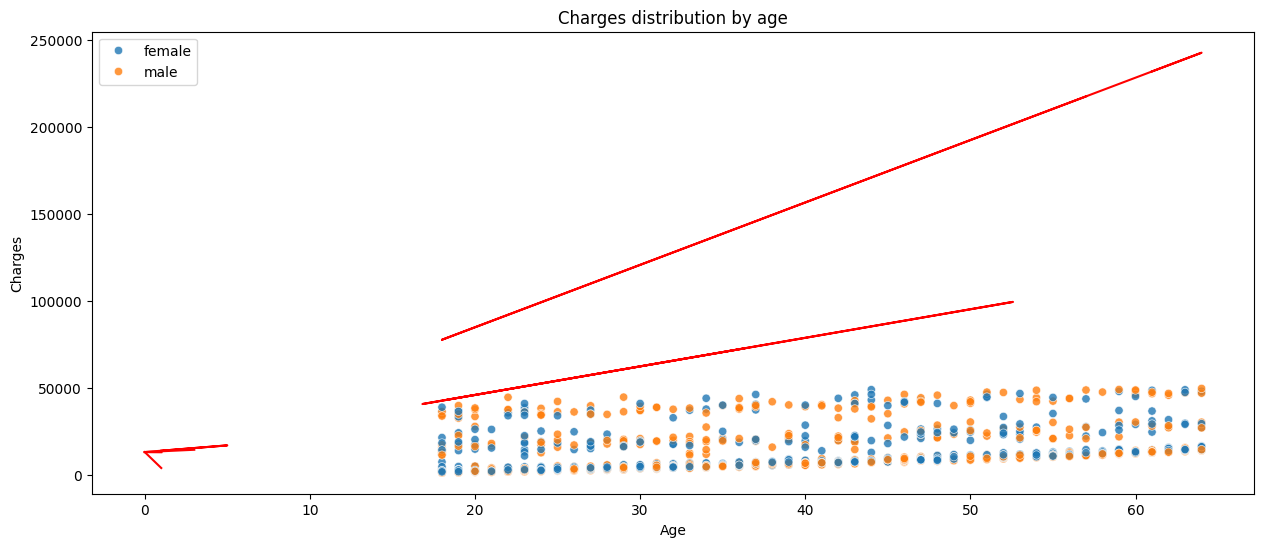

In [ ]:


plt.figure(figsize=(15, 6))

sns.scatterplot(data=df, x='age', y='charges', hue='sex', alpha=0.8)
sorted_idx = X_descaled['age'].argsort()
age_sorted = X_descaled['age'].iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

#plt.plot(age_sorted, y_pred_sorted ,color='red', linewidth=2, label='Regresión lineal')
plt.plot(X_descaled, regression, color='red')

plt.title('Charges distribution by age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()
